# Assignment 1 - Single Perceptron Algorithm
---
Muhammed Ersoy - mue@tamu.edu - [Github Repository](https://github.com/UlascanErsoy/ECEN427-TAMU)

- [Step 1 | Loading the data](#step1)
- [Step 2 | Visualizing the Feature Vectors](#step2)
- [Step 3 | The Single Layer Perceptron Algorithm](#step3)
- [Step 4 | Attempting Non-Linear Classification](#step4)

---

### Step 0 - Environment

In [423]:
from typing import Optional, List
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

<h3 id="step1">Step 1 - Downloading & Loading the Data</h4>

In [424]:
df = pd.read_csv(
            "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
            header=None,
            encoding="utf-8"
        )
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width','Class']

df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<h3 id="step2">Step 2 - Visualizing the Feature Vectors</h3>

<Axes: xlabel='Sepal Length', ylabel='Petal Length'>

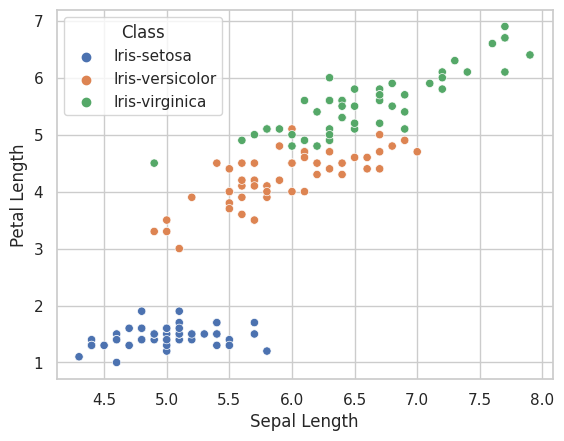

In [425]:
seaborn.set(style='whitegrid')
seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)

`Iris-setosa` and `Iris-versicolor` **are** linearly seperable while `Iris-versicolor` and `Iris-virginica` are <ins>**not**</ins> linearly seperable.

`Iris-setosa` and `Iris-virginica` **are** also linearly seperable.

<h3 id="step3">Step 3 - The Single Layer Perceptron Algorithm</h3>

In [426]:
class SingleLayerPerceptron:

    def __init__(self, weights: Optional[np.ndarray] = None,
                       n: Optional[int] = 1000,
                       alpha: float = 1):
        """Initialize a Single Layer Perceptron
        :param n: number of training iterations
        :type n: int
        :param alpha: the learning rate
        :type alpha: float , 0 < a < 1
        """ 
        self.weights: Optional[np.ndarray] = weights
        self.n: Optional[int] = n
        self.alpha: float = alpha
        self.updates: List[int] = []
        self.error_rates: List[float] = []

    def train(self, 
                X: np.ndarray, 
                y: np.ndarray,
                seed: Optional[int] = None
              ):
        """Train the weights for the perceptron algorithm 
            :param X: ndarray of feature vectors, bias element will
            be added automatically
            :type X: ndarray
            :param y: ndarray of result vector
            :type y: ndarray
            :param seed: seed for random number generator
            :type seed: None or int
        """
        X = np.insert(X, 0, 1, axis=1) # bias element

        if self.weights is None:
            rng = np.random.RandomState(seed=seed)
            self.weights = rng.normal(
                loc=0.0,
                scale=0.01,
                size=X.shape[1]
            )

        for _ in range(self.n):
            self.updates.append(0)
            for xi, yi in zip(X,y):
                update = self.alpha * (yi - self._predict(xi))
                self.weights += update * xi

                if update > 0:
                    self.updates[-1] += 1

            prediction = self.predict(X)
            self.error_rates.append(
                100 * (len(y) - np.equal(prediction,y).sum())/len(y)
            )
            # break if no corrections were made
            if (self.updates[-1] == 0 
                    and len(self.updates) > 1):
                break

    def _predict(self, xi: np.ndarray) -> int:
        """Generate a prediction based on the weights
            :param xi: ndarray of feature vectors, bias element will
            be added automatically
            :type xi: ndarray
            :returns: prediction
            :rtype: int
        """
        return 1 if np.dot(xi, self.weights) >= 0 else 0
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions for the input dataset
        """
        if X[0].shape != self.weights.shape:
            X = np.insert(X, 0, 1, axis=1)
        
        return np.array([
            self._predict(xi) for xi in X
        ])

    def draw_decision_boundary(self,
                                X: np.ndarray,
                                r: float = 0.02):
        """Draw the decision boundary
        requires matplotlib
        :param X: feature vector
        :type X: np.ndarray
        :param r: resolution of the grid
        :type r: float
        """
        #define the corner points for a rectangle that
        #encapsulates our (2d) feature plane
        x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #generate points on this plane 
        #that splits the plane into a grid
        xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, r),
            np.arange(x2_min, x2_max, r)
        )

        #generate predictions for everypoint in this grid
        #using the trained model
        pred = self.predict(
            np.array([xx1.ravel(), xx2.ravel()]).T
        )

        pred = pred.reshape(xx1.shape)
        
        colors = ['red','blue']
        if pred[0][0] == 0:
            colors = colors[::-1]
            
        cmap = ListedColormap(colors)
        plt.contourf(xx1, xx2, pred, alpha=0.3, cmap=cmap)

    def plot_training_info(self):
        """
        Plots the error rate and updates
        **requires** matplotlib, seaborn
        """
        fig, ax = plt.subplots(1, 2,sharex=True, figsize=(10,5))

        ax[1].set_title("Error Rate (%)")
        ax[0].set_title("Updates (c)")
        
        g = seaborn.lineplot(
            ax=ax[0],
            data=self.updates
        )

        g.set(xlabel="Epochs (c)", ylabel="Updates (c)")

        g = seaborn.lineplot(
            ax=ax[1],
            color="orange",
            data=self.error_rates
        )
        g.set(xlabel="Epochs (c)", ylabel="Error Rate (%)")




### Useful Utility Function(s)

Filter the data to only have two linearly seperable classes, and replace class names with `0` or `1` to be used as the target
parameter in the model.

In [427]:
def prepare_data(df: pd.DataFrame, 
                 features: List[str],
                 class_row: str = "Class") -> (np.ndarray, np.ndarray):
    """Prepare the dataframe into input and target arrays
    :param df: pandas dataframe containing feature and target vectors
    :type df: DataFrame
    :param features: row names of features as a list
    :type features: List of strings
    :param class_row: Row name of target vector
    :type class_row: str (default = "Class")
    :returns: X , y
    :rtype: np.ndarray , np.ndarray
    """
    id_map = {name: idx 
                for idx, name in enumerate(set(df[class_row]))
                }
    
    y = df[class_row]\
            .apply(lambda x: id_map[x])\
            .to_numpy()
    
    X = df[features].to_numpy()

    return X , y


#### `Iris-setosa` vs `Iris-versicolor`

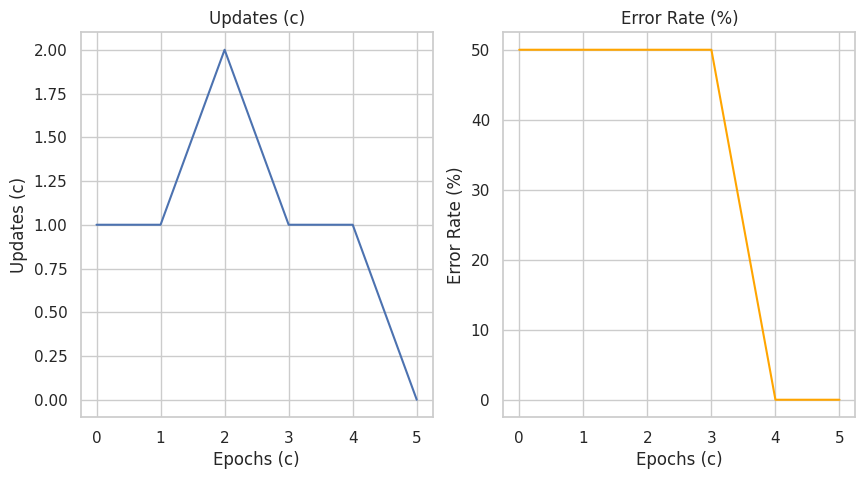

In [428]:
#use the model
features = ['Sepal Length','Petal Length']

model = SingleLayerPerceptron(n = 100)
clean_df = df[df['Class'].isin(['Iris-setosa','Iris-versicolor'])]

X , y = prepare_data(
    clean_df,
    features
)

model.train(
    X,
    y
)

model.plot_training_info()

100.00% Success Rate


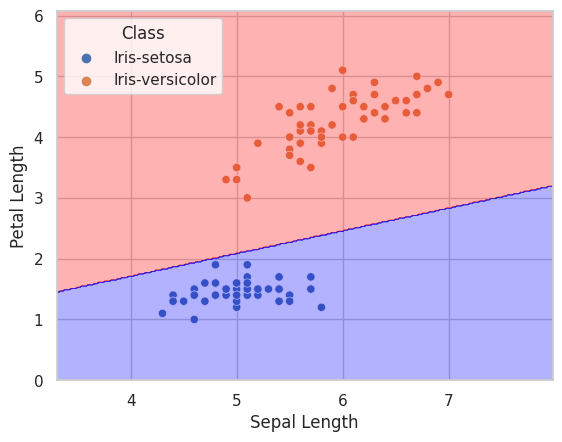

In [429]:
predict = model.predict(X)

splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=clean_df)

model.draw_decision_boundary(X)
print(f"{100 - model.error_rates[-1]:.2f}% Success Rate")

#### `Iris-setosa` vs `Iris-virginica`

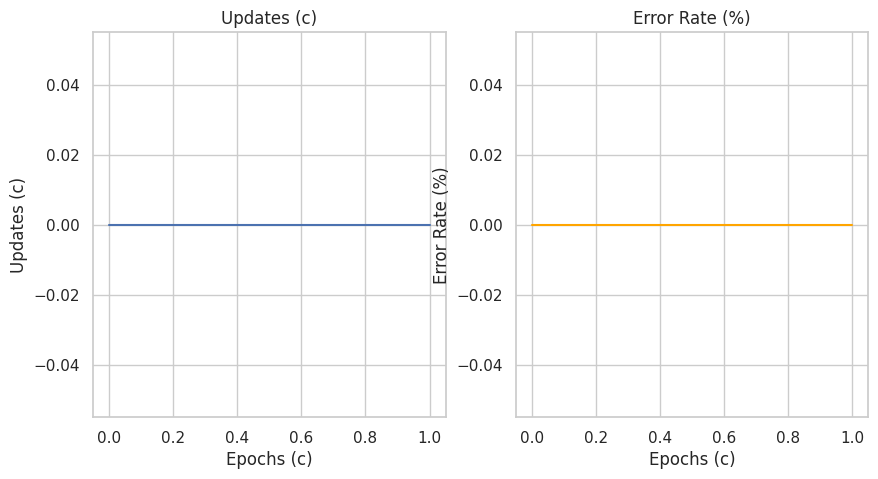

In [430]:
model = SingleLayerPerceptron(n = 100)
class_pair = ['Iris-setosa','Iris-virginica']
clean_df = df[df['Class'].isin(class_pair)]
X , y = prepare_data(
    clean_df,
    features
)

model.train(
    X,
    y
)

model.plot_training_info()

Sepal Length            5.1
Sepal Width             3.5
Petal Length            1.4
Petal Width             0.2
Class           Iris-setosa
Name: 0, dtype: object
100.00% Success Rate


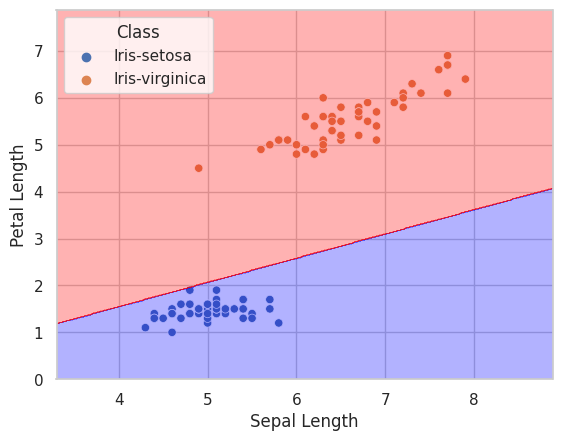

In [431]:
predict = model.predict(X)

splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=clean_df)
print(clean_df.loc[0])
model.draw_decision_boundary(X)
print(f"{100 - model.error_rates[-1]:.2f}% Success Rate")

Models for the ***linearly*** seperable classes converges quite quickly. 

#### Shuffling the Dataset
Randomizing the order of the dataset also seems to speed up the convergence time (in epochs).

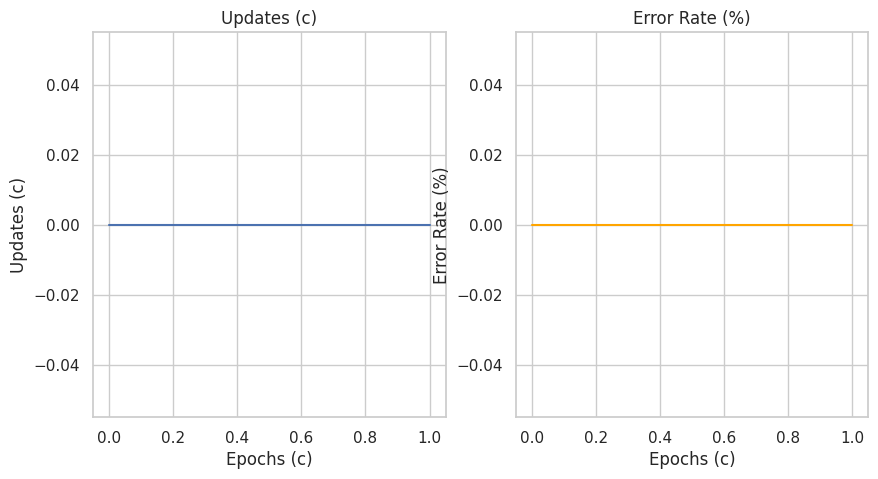

In [432]:
model = SingleLayerPerceptron(n = 100)
clean_df = df[df['Class'].isin(['Iris-setosa','Iris-virginica'])].sample(frac = 1)
X , y = prepare_data(
    clean_df,
    features
)

model.train(
    X,
    y
)

model.plot_training_info()

The perceptron algorithm converged within a single `Epoch` when the dataset was shuffled versus 3-4 epochs without the shuffling.

<h3 id="step4">Step 4 - Attempting Non-Linear Classification</h3>

#### `Iris-virginica` vs `Iris-versicolor`

These classes are not `linearly` seperable.

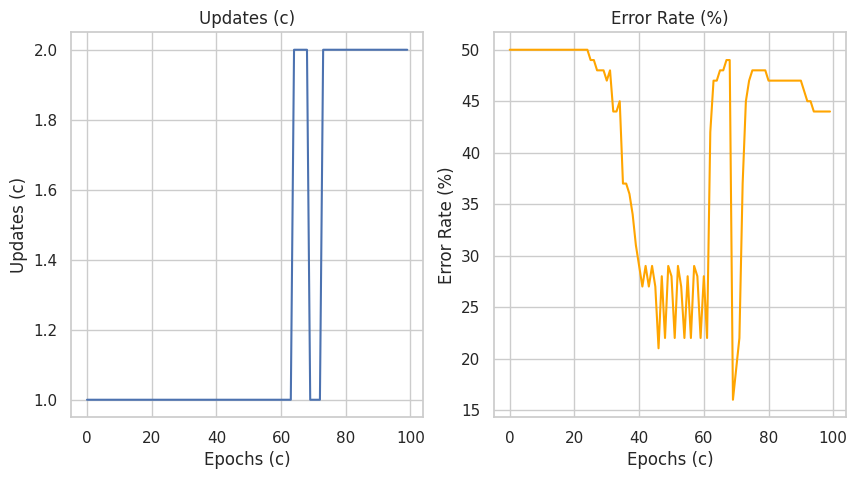

In [433]:
model = SingleLayerPerceptron(n = 100)
clean_df = df[df['Class'].isin(['Iris-virginica','Iris-versicolor'])]
X , y = prepare_data(
    clean_df,
    features
)

model.train(
    X,
    y
)

model.plot_training_info()

The algorithm is unable to converge. The `error-rate` and the `updates per epoch` does not continously decrease.

The success rate is ~50% which means that our algorithm does not perform any better than flipping a coin.

56.00% Success Rate


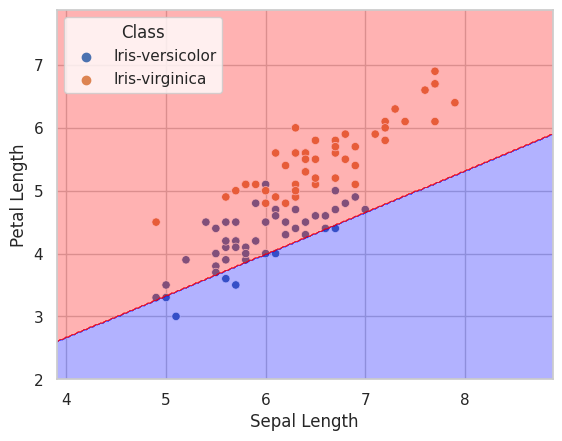

In [434]:
predict = model.predict(X)

splt = seaborn.scatterplot(
                    x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=clean_df)

model.draw_decision_boundary(X)
print(f"{100 - model.error_rates[-1]:.2f}% Success Rate")